# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-theta-fu1.new.56.420.422.429.449.fix.438.441.450'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Timor-Leste', 'Solomon Islands', 'Holy See', 'Laos'],
 3: ['Saint Kitts and Nevis'],
 4: ['Fiji', 'Brunei', 'Tanzania', 'Dominica'],
 5: ['Grenada', 'Saint Lucia', 'Equatorial Guinea'],
 6: ['Cambodia', 'Antigua and Barbuda', 'Mauritius'],
 7: ['Saint Vincent and the Grenadines'],
 8: ['Barbados', 'Madagascar', 'Trinidad and Tobago', 'Bahamas', 'Kyrgyzstan',
     'Northern Mariana Islands', 'Gambia'],
 9: ['Monaco', 'Seychelles', 'Australia', 'Uzbekistan', 'Ghana',
     'Liechtenstein', 'Malawi', 'Kazakhstan', 'Jamaica', 'Vietnam',
     'Republic of the Congo', 'Sao Tome and Principe', 'Philippines', 'Bolivia',
     'Oman'],
 10: ['Ethiopia', 'Guyana', 'Senegal', 'Eritrea', 'Guatemala', 'Iceland',
      'Djibouti', 'Libya', 'Lesotho', 'Zimbabwe', 'Zambia', 'El Salvador',
      'Iraq', 'Bahrain', 'Suriname', 'Kenya', 'Honduras', 'Burundi', 'Kuwait',
      'Mongolia', 'Maldives', 'Andorra', 'Angola', 'Cape Verde', 'South Africa',
      'Singapore', 'Swaziland', 'Namibia', 'Venezuel

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Portugal', 'Malaysia', 'Netherlands', 'United Kingdom'],
 18: ['Germany', 'Norway']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  19Jan2020  23Mar2020    82905782
        1st    Past  24Mar2020  04Apr2020    82905782
        2nd    Past  05Apr2020  21Apr2020    82905782
        3rd    Past  22Apr2020  17Jun2020    82905782
        4th    Past  18Jun2020  15Aug2020    82905782
        5th    Past  16Aug2020  16Sep2020    82905782
        6th    Past  17Sep2020  08Oct2020    82905782
        7th    Past  09Oct2020  20Oct2020    82905782
        8th    Past  21Oct2020  27Oct2020    82905782
        9th    Past  28Oct2020  03Nov2020    82905782
        10th   Past  04Nov2020  10Nov2020    82905782
        11th   Past  11Nov2020  17Nov2020    82905782
        12th   Past  18Nov2020  24Nov2020    82905782
        13th   Past  25Nov2020  01Dec2020    82905782
        14th   Past  02Dec2020  08Dec2020    82905782
        15th   Past  09Dec2020  14Dec2020    82905782
        16th   Past  15Dec2020  20Dec2020    82905782
        17th   Past  21Dec2020  27Dec2020    82905782
Norway  0th    Past  15Mar2020  24Mar2020     5311916
        1st    Past  25Mar2020  02Apr2020     5311916
        2nd    Past  03Apr2020  20Apr2020     5311916
        3rd    Past  21Apr2020  02Jun2020     5311916
        4th    Past  03Jun2020  09Aug2020     5311916
        5th    Past  10Aug2020  04Sep2020     5311916
        6th    Past  05Sep2020  20Sep2020     5311916
        7th    Past  21Sep2020  05Oct2020     5311916
        8th    Past  06Oct2020  20Oct2020     5311916
        9th    Past  21Oct2020  28Oct2020     5311916
        10th   Past  29Oct2020  03Nov2020     5311916
        11th   Past  04Nov2020  09Nov2020     5311916
        12th   Past  10Nov2020  22Nov2020     5311916
        13th   Past  23Nov2020  29Nov2020     5311916
        14th   Past  30Nov2020  07Dec2020     5311916
        15th   Past  08Dec2020  14Dec2020     5311916
        16th   Past  15Dec2020  20Dec2020     5311916
        17th   Past  21Dec2020  27Dec2020     5311916

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  307 trials in 0 min 10 sec

	PRT,  8th phase (14Oct2020 - 21Oct2020): finished  311 trials in 0 min 10 sec

	GBR,  4th phase (06Aug2020 - 15Sep2020): finished  302 trials in 0 min 10 sec

	NLD,  3rd phase (08Aug2020 - 08Sep2020): finished  303 trials in 0 min 10 sec

	NOR,  1st phase (25Mar2020 - 02Apr2020): finished  328 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  322 trials in 0 min 10 sec

	PRT, 15th phase (10Dec2020 - 16Dec2020): finished  331 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  317 trials in 0 min 10 sec

	PRT, 14th phase (03Dec2020 - 09Dec2020): finished  312 trials in 0 min 10 sec

	DEU,  9th phase (28Oct2020 - 03Nov2020): finished  339 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 17Jun2020): finished  316 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  296 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  325 trials in 0 min 10 sec

	NOR,  4th phase (03Jun2020 - 09Aug2020): finished  316 trials in 0 min 10 sec

	MYS,  7th phase (12Oct2020 - 17Oct2020): finished  335 trials in 0 min 10 sec

	MYS,  8th phase (18Oct2020 - 27Oct2020): finished  332 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  321 trials in 0 min 10 sec

	MYS, 13th phase (29Nov2020 - 04Dec2020): finished  328 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  310 trials in 0 min 10 sec

	GBR,  5th phase (16Sep2020 - 02Oct2020): finished  323 trials in 0 min 10 sec

	PRT, 11th phase (05Nov2020 - 14Nov2020): finished  326 trials in 0 min 10 sec

	MYS,  9th phase (28Oct2020 - 02Nov2020): finished  330 trials in 0 min 10 sec

	NOR,  7th phase (21Sep2020 - 05Oct2020): finished  324 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  320 trials in 0 min 10 sec

	MYS, 10th phase (03Nov2020 - 12Nov2020): finished  309 trials in 0 min 10 sec

	GBR, 14th phase (03Dec2020 - 10Dec2020): finished  308 trials in 0 min 10 sec

	MYS, 14th phase (05Dec2020 - 14Dec2020): finished  311 trials in 0 min 10 sec

	NLD, 12th phase (20Nov2020 - 27Nov2020): finished  311 trials in 0 min 10 sec

	NOR, 12th phase (10Nov2020 - 22Nov2020): finished  327 trials in 0 min 10 sec

	NOR, 15th phase (08Dec2020 - 14Dec2020): finished  326 trials in 0 min 10 sec

	DEU, 15th phase (09Dec2020 - 14Dec2020): finished  327 trials in 0 min 10 sec

	PRT,  9th phase (22Oct2020 - 28Oct2020): finished  322 trials in 0 min 10 sec

	NOR, 10th phase (29Oct2020 - 03Nov2020): finished  297 trials in 0 min 10 sec

	MYS,  5th phase (11Sep2020 - 03Oct2020): finished  294 trials in 0 min 10 sec

	DEU,  8th phase (21Oct2020 - 27Oct2020): finished  309 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  307 trials in 0 min 10 sec

	PRT, 10th phase (29Oct2020 - 04Nov2020): finished  319 trials in 0 min 10 sec

	NLD, 10th phase (05Nov2020 - 11Nov2020): finished  323 trials in 0 min 10 sec

	NLD,  5th phase (23Sep2020 - 01Oct2020): finished  322 trials in 0 min 10 sec

	NOR,  3rd phase (21Apr2020 - 02Jun2020): finished  310 trials in 0 min 10 sec

	MYS, 12th phase (23Nov2020 - 28Nov2020): finished  319 trials in 0 min 10 sec

	GBR, 13th phase (25Nov2020 - 02Dec2020): finished  317 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  308 trials in 0 min 10 sec

	NOR,  6th phase (05Sep2020 - 20Sep2020): finished  312 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 24Mar2020): finished  315 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  316 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  317 trials in 0 min 10 sec

	MYS,  2nd phase (09Apr2020 - 01May2020): finished  309 trials in 0 min 10 sec

	DEU, 11th phase (11Nov2020 - 17Nov2020): finished  314 trials in 0 min 10 sec

	NLD,  9th phase (25Oct2020 - 04Nov2020): finished  317 trials in 0 min 10 sec

	NOR,  2nd phase (03Apr2020 - 20Apr2020): finished  310 trials in 0 min 10 sec

	NLD,  1st phase (08Apr2020 - 01May2020): finished  313 trials in 0 min 10 sec

	MYS, 15th phase (15Dec2020 - 20Dec2020): finished  317 trials in 0 min 10 sec

	NLD, 15th phase (11Dec2020 - 16Dec2020): finished  309 trials in 0 min 10 sec

	NLD,  6th phase (02Oct2020 - 08Oct2020): finished  309 trials in 0 min 10 sec

	NOR,  5th phase (10Aug2020 - 04Sep2020): finished  310 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  309 trials in 0 min 10 sec

	NOR,  8th phase (06Oct2020 - 20Oct2020): finished  308 trials in 0 min 10 sec

	NLD,  8th phase (15Oct2020 - 24Oct2020): finished  314 trials in 0 min 10 sec

	NLD, 11th phase (12Nov2020 - 19Nov2020): finished  316 trials in 0 min 10 sec

	NOR, 13th phase (23Nov2020 - 29Nov2020): finished  311 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 07Apr2020): finished  300 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  307 trials in 0 min 10 sec

	DEU, 10th phase (04Nov2020 - 10Nov2020): finished  309 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  298 trials in 0 min 10 sec

	MYS,  3rd phase (02May2020 - 01Jun2020): finished  290 trials in 0 min 10 sec

	MYS,  4th phase (02Jun2020 - 10Sep2020): finished  275 trials in 0 min 10 sec

	PRT, 13th phase (26Nov2020 - 02Dec2020): finished  305 trials in 0 min 10 sec

	PRT, 16th phase (17Dec2020 - 27Dec2020): finished  302 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  289 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  304 trials in 0 min 10 sec

	NOR, 14th phase (30Nov2020 - 07Dec2020): finished  300 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  308 trials in 0 min 10 sec

	NOR, 11th phase (04Nov2020 - 09Nov2020): finished  315 trials in 0 min 10 sec

	NLD,  2nd phase (02May2020 - 07Aug2020): finished  286 trials in 0 min 10 sec

	NLD,  7th phase (09Oct2020 - 14Oct2020): finished  316 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  274 trials in 0 min 10 sec

	NOR,  9th phase (21Oct2020 - 28Oct2020): finished  280 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 05Aug2020): finished  262 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  271 trials in 0 min 10 sec

	DEU, 14th phase (02Dec2020 - 08Dec2020): finished  324 trials in 0 min 10 sec

	MYS, 11th phase (13Nov2020 - 22Nov2020): finished  322 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  309 trials in 0 min 10 sec

	MYS,  6th phase (04Oct2020 - 11Oct2020): finished  321 trials in 0 min 10 sec

	NLD, 14th phase (05Dec2020 - 10Dec2020): finished  324 trials in 0 min 10 sec

	MYS, 16th phase (21Dec2020 - 27Dec2020): finished  324 trials in 0 min 10 sec

	PRT,  7th phase (01Oct2020 - 13Oct2020): finished  319 trials in 0 min 10 sec

	NLD,  4th phase (09Sep2020 - 22Sep2020): finished  320 trials in 0 min 10 sec

	PRT, 12th phase (15Nov2020 - 25Nov2020): finished  323 trials in 0 min 10 sec

	MYS,  1st phase (25Mar2020 - 08Apr2020): finished  321 trials in 0 min 10 sec

	NLD, 13th phase (28Nov2020 - 04Dec2020): finished  327 trials in 0 min 10 sec

	MYS,  0th phase (11Feb2020 - 24Mar2020): finished  317 trials in 0 min 10 sec

Completed optimization. Total: 4 min 17 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country Phase                                                         
Germany 0th    Past  19Jan2020  23Mar2020    82905782  SIR-F  30.65   
        1st    Past  24Mar2020  04Apr2020    82905782  SIR-F   4.78   
        2nd    Past  05Apr2020  21Apr2020    82905782  SIR-F   0.66   
        3rd    Past  22Apr2020  17Jun2020    82905782  SIR-F   0.53   
        4th    Past  18Jun2020  15Aug2020    82905782  SIR-F   1.15   
        5th    Past  16Aug2020  16Sep2020    82905782  SIR-F   1.31   
        6th    Past  17Sep2020  08Oct2020    82905782  SIR-F   1.34   
        7th    Past  09Oct2020  20Oct2020    82905782  SIR-F   3.13   
        8th    Past  21Oct2020  27Oct2020    82905782  SIR-F   3.03   
        9th    Past  28Oct2020  03Nov2020    82905782  SIR-F    2.3   
        10th   Past  04Nov2020  10Nov2020    82905782  SIR-F   1.46   
        11th   Past  11Nov2020  17Nov2020    82905782  SIR-F   1.05   
        12th   Past  18Nov2020  24Nov2020    82905782  SIR-F   0.86   
        13th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.92   
        14th   Past  02Dec2020  08Dec2020    82905782  SIR-F   0.98   
        15th   Past  09Dec2020  14Dec2020    82905782  SIR-F   1.18   
        16th   Past  15Dec2020  20Dec2020    82905782      -      -   
        17th   Past  21Dec2020  27Dec2020    82905782      -      -   
Norway  0th    Past  15Mar2020  24Mar2020     5311916  SIR-F   11.3   
        1st    Past  25Mar2020  02Apr2020     5311916  SIR-F    1.4   
        2nd    Past  03Apr2020  20Apr2020     5311916  SIR-F   0.29   
        3rd    Past  21Apr2020  02Jun2020     5311916  SIR-F   0.42   
        4th    Past  03Jun2020  09Aug2020     5311916  SIR-F   0.99   
        5th    Past  10Aug2020  04Sep2020     5311916  SIR-F   1.46   
        6th    Past  05Sep2020  20Sep2020     5311916  SIR-F   1.49   
        7th    Past  21Sep2020  05Oct2020     5311916  SIR-F   1.05   
        8th    Past  06Oct2020  20Oct2020     5311916  SIR-F   1.25   
        9th    Past  21Oct2020  28Oct2020     5311916  SIR-F   1.85   
        10th   Past  29Oct2020  03Nov2020     5311916  SIR-F   3.43   
        11th   Past  04Nov2020  09Nov2020     5311916  SIR-F   2.58   
        12th   Past  10Nov2020  22Nov2020     5311916  SIR-F   1.41   
        13th   Past  23Nov2020  29Nov2020     5311916  SIR-F   0.83   
        14th   Past  30Nov2020  07Dec2020     5311916  SIR-F   0.61   
        15th   Past  08Dec2020  14Dec2020     5311916  SIR-F    0.8   
        16th   Past  15Dec2020  20Dec2020     5311916      -      -   
        17th   Past  21Dec2020  27Dec2020     5311916      -      -   

                     theta        kappa         rho        sigma  tau  \
Country Phase                                                           
Germany 0th    0.000158258  0.000153043   0.0323128  0.000901171  360   
        1st      0.0163325  0.000982532   0.0227415   0.00369525  360   
        2nd      0.0184018  0.000556605   0.0121387    0.0174393  360   
        3rd      0.0161643  0.000162385   0.0124085    0.0230873  360   
        4th     0.00379861  1.85307e-06   0.0162702    0.0141322  360   
        5th     0.00156721  0.000191478   0.0163251    0.0122403  360   
        6th    0.000425864  7.95615e-05   0.0187149    0.0138663  360   
        7th    0.000676492  6.74045e-05   0.0257738   0.00815667  360   
        8th     0.00261679  0.000301315   0.0272942   0.00868869  360   
        9th     0.00025608  0.000256566   0.0181455   0.00764573  360   
        10th   0.000663153  0.000234996   0.0175328    0.0117848  360   
        11th     0.0162359  4.55898e-06    0.017074    0.0159345  360   
        12th     0.0163381  4.55898e-06   0.0152931    0.0174301  360   
        13th   0.000322669  0.000158406   0.0146422    0.0157984  360   
        14th    0.00269604  0.000301055   0.0188815     0.018845  360   
        15th     0.0155796  4.05568e-05   0.0186713    0.0155951  360   
  

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-14,Portugal,0.0196476,0.000728339,0.0443293,0.000245798,0.02,343,5,1017,...,0,0,0,0,0,3,2,1,2,32.41
1,2020-03-14,Portugal,0.0196476,0.000728339,0.0443293,0.000245798,0.02,343,5,1017,...,0,0,0,0,0,3,2,1,2,32.41
2,2020-03-14,Portugal,0.0196476,0.000728339,0.0443293,0.000245798,0.02,343,5,1017,...,0,0,0,0,0,3,2,1,2,32.41
3,2020-03-14,Portugal,0.0196476,0.000728339,0.0443293,0.000245798,0.02,343,5,1017,...,0,0,0,0,0,3,2,1,2,32.41
4,2020-03-14,Portugal,0.0196476,0.000728339,0.0443293,0.000245798,0.02,343,5,1017,...,0,0,0,0,0,3,2,1,2,32.41


### $Rt$: Reprodcution number $\mathrm{[-]}$

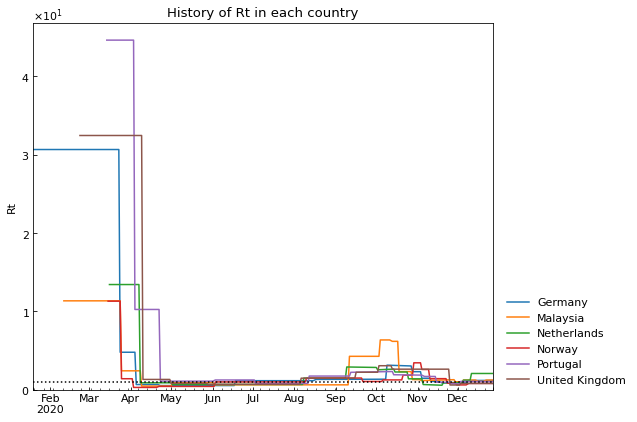

Country,Germany,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,
2020-12-23,1.18,1.23,2.07,0.8,1.03,0.8
2020-12-24,1.18,1.23,2.07,0.8,1.03,0.8
2020-12-25,1.18,1.23,2.07,0.8,1.03,0.8
2020-12-26,1.18,1.23,2.07,0.8,1.03,0.8
2020-12-27,1.18,1.23,2.07,0.8,1.03,0.8


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

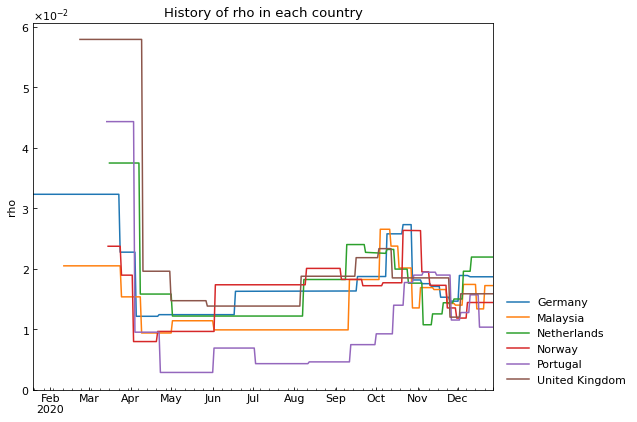

Country,Germany,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,
2020-12-23,0.018671,0.017214,0.021935,0.014418,0.010343,0.015859
2020-12-24,0.018671,0.017214,0.021935,0.014418,0.010343,0.015859
2020-12-25,0.018671,0.017214,0.021935,0.014418,0.010343,0.015859
2020-12-26,0.018671,0.017214,0.021935,0.014418,0.010343,0.015859
2020-12-27,0.018671,0.017214,0.021935,0.014418,0.010343,0.015859


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

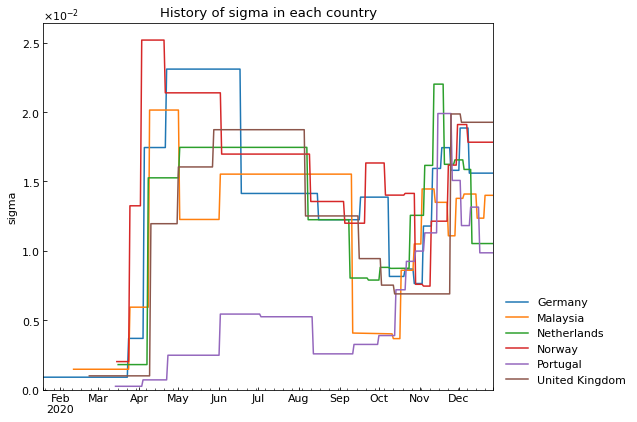

Country,Germany,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,
2020-12-23,0.015595,0.013997,0.010525,0.017822,0.009858,0.019258
2020-12-24,0.015595,0.013997,0.010525,0.017822,0.009858,0.019258
2020-12-25,0.015595,0.013997,0.010525,0.017822,0.009858,0.019258
2020-12-26,0.015595,0.013997,0.010525,0.017822,0.009858,0.019258
2020-12-27,0.015595,0.013997,0.010525,0.017822,0.009858,0.019258


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

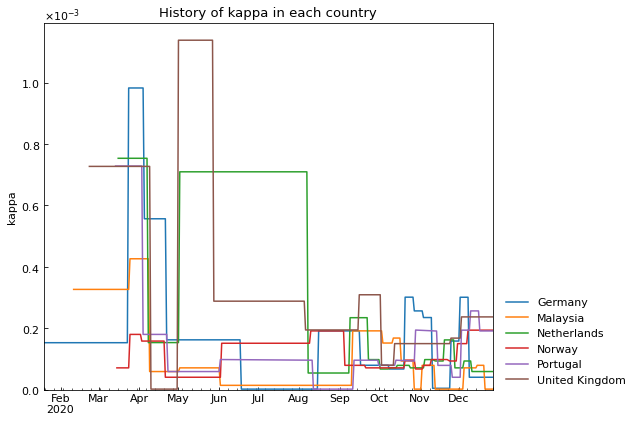

Country,Germany,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,
2020-12-23,0.000041,0.000002,0.000059,0.000194,0.000191,0.000237
2020-12-24,0.000041,0.000002,0.000059,0.000194,0.000191,0.000237
2020-12-25,0.000041,0.000002,0.000059,0.000194,0.000191,0.000237
2020-12-26,0.000041,0.000002,0.000059,0.000194,0.000191,0.000237
2020-12-27,0.000041,0.000002,0.000059,0.000194,0.000191,0.000237


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

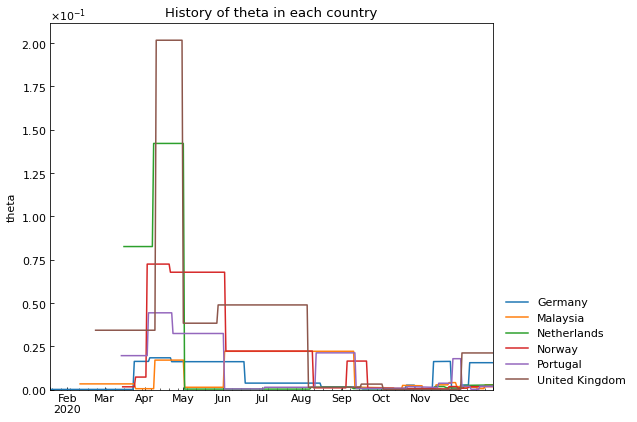

Country,Germany,Malaysia,Netherlands,Norway,Portugal,United Kingdom
Date,,,,,,
2020-12-23,0.01558,0.002801,0.002749,0.001759,0.001978,0.0212
2020-12-24,0.01558,0.002801,0.002749,0.001759,0.001978,0.0212
2020-12-25,0.01558,0.002801,0.002749,0.001759,0.001978,0.0212
2020-12-26,0.01558,0.002801,0.002749,0.001759,0.001978,0.0212
2020-12-27,0.01558,0.002801,0.002749,0.001759,0.001978,0.0212


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19832 entries, 0 to 19901
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 19832 non-null  datetime64[ns]
 1   Country                              19832 non-null  object        
 2   Rt                                   19832 non-null  float64       
 3   theta                                19832 non-null  float64       
 4   kappa                                19832 non-null  float64       
 5   rho                                  19832 non-null  float64       
 6   sigma                                19832 non-null  float64       
 7   School_closing                       19832 non-null  int64         
 8   Workplace_closing                    19832 non-null  int64         
 9   Cancel_events                        19832 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.008039,0.280644,0.855516,-0.678988,-0.262334,-0.521014,-0.680630,-0.731535,-0.295415,-0.288569,-0.423526,-0.534608,-0.458742,-0.572218,-0.280156,-0.566829
theta,-0.008039,1.000000,0.052060,0.072697,0.066589,0.489286,0.354670,0.085096,0.063409,0.178804,0.352215,0.251909,-0.370476,0.090292,-0.339894,-0.338655,0.288858
kappa,0.280644,0.052060,1.000000,0.348921,-0.044084,0.237587,0.103534,-0.087560,-0.198773,0.071169,0.029954,0.047031,-0.334567,0.057948,-0.476514,-0.281816,0.011702
rho,0.855516,0.072697,0.348921,1.000000,-0.564195,-0.245284,-0.349741,-0.551740,-0.530104,-0.251150,-0.242173,-0.263720,-0.549087,-0.227093,-0.529841,-0.186980,-0.440567
sigma,-0.678988,0.066589,-0.044084,-0.564195,1.000000,0.287187,0.336414,0.450712,0.482147,0.096592,0.066723,0.296621,0.312573,0.302757,0.284349,0.280879,0.362665
School_closing,-0.262334,0.489286,0.237587,-0.245284,0.287187,1.000000,0.625072,0.487344,0.448050,0.286889,0.499435,0.540015,0.017638,0.305584,-0.060411,-0.193378,0.697822
Workplace_closing,-0.521014,0.354670,0.103534,-0.349741,0.336414,0.625072,1.000000,0.762648,0.726848,0.464161,0.706300,0.572050,0.219574,0.510326,0.245985,-0.135917,0.844320
Cancel_events,-0.680630,0.085096,-0.087560,-0.551740,0.450712,0.487344,0.762648,1.000000,0.783866,0.387812,0.565692,0.574507,0.438912,0.581976,0.488818,0.067416,0.831808
Gatherings_restrictions,-0.731535,0.063409,-0.198773,-0.530104,0.482147,0.448050,0.726848,0.783866,1.000000,0.346518,0.468236,0.601796,0.397634,0.520992,0.510671,0.110857,0.801375
Transport_closing,-0.295415,0.178804,0.071169,-0.251150,0.096592,0.286889,0.464161,0.387812,0.346518,1.000000,0.440804,0.489228,-0.089319,0.249161,-0.041773,-0.155892,0.489307


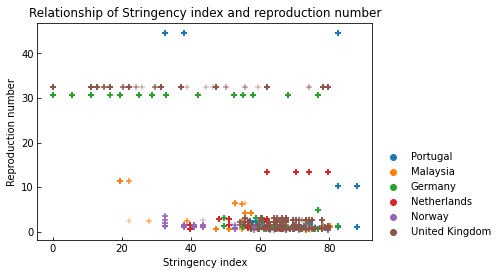

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()